<a href="https://colab.research.google.com/github/Grey-Nirvana/Stroke-Prediction/blob/main/Stroke_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Stroke Prediction Dataset

## Downloading the dataset from Kaggle 

In [67]:
pip install opendatasets --upgrade --quiet

In [68]:
import opendatasets as od

dataset_url = 'https://www.kaggle.com/fedesoriano/stroke-prediction-dataset'

od.download(dataset_url)

Skipping, found downloaded files in "./stroke-prediction-dataset" (use force=True to force download)


In [69]:
dataset = './stroke-prediction-dataset/healthcare-dataset-stroke-data.csv'

## Imports

In [70]:
import pandas as pd
import seaborn as sns
import plotly.express as px

## Reading dataset into pandas dataframe

In [71]:
df = pd.read_csv(dataset)

In [72]:
df.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


## Some exploratory analysis 

In [73]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   Residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                4909 non-null   float64
 10  smoking_status     5110 non-null   object 
 11  stroke             5110 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 479.2+ KB


In [74]:
df.describe()

,id,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
count,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,4909.000000,5110.000000
mean,36517.829354,43.226614,0.097456,0.054012,106.147677,28.893237,0.048728
std,21161.721625,22.612647,0.296607,0.226063,45.283560,7.854067,0.215320
min,67.000000,0.080000,0.000000,0.000000,55.120000,10.300000,0.000000
25%,17741.250000,25.000000,0.000000,0.000000,77.245000,23.500000,0.000000
50%,36932.000000,45.000000,0.000000,0.000000,91.885000,28.100000,0.000000
75%,54682.000000,61.000000,0.000000,0.000000,114.090000,33.100000,0.000000
max,72940.000000,82.000000,1.000000,1.000000,271.740000,97.600000,1.000000


In [75]:
df.describe(include='O')

,gender,ever_married,work_type,Residence_type,smoking_status
count,5110,5110,5110,5110,5110
unique,3,2,5,2,4
top,Female,Yes,Private,Urban,never smoked
freq,2994,3353,2925,2596,1892


In [76]:
corr = df.corr()
corr

,id,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
id,1.000000,0.003538,0.003550,-0.001296,0.001092,0.003084,0.006388
age,0.003538,1.000000,0.276398,0.263796,0.238171,0.333398,0.245257
hypertension,0.003550,0.276398,1.000000,0.108306,0.174474,0.167811,0.127904
heart_disease,-0.001296,0.263796,0.108306,1.000000,0.161857,0.041357,0.134914
avg_glucose_level,0.001092,0.238171,0.174474,0.161857,1.000000,0.175502,0.131945
bmi,0.003084,0.333398,0.167811,0.041357,0.175502,1.000000,0.042374
stroke,0.006388,0.245257,0.127904,0.134914,0.131945,0.042374,1.000000


## Data visualization

### - Age

In [77]:
px.histogram(df, x='age')

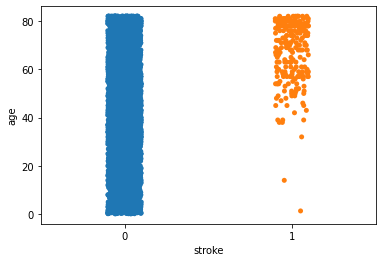

In [78]:
sns.stripplot(x='stroke', y='age', data=df)

- From the stripplot above of the occurence of stroke vs age, it can be inferred that stroke events are more likely and tend to occur in much older individuals and are not so common in young individuals.

### - Gender

In [79]:
px.histogram(df, x='gender', color='stroke')

- 2115 males and 2994 females and a single person with a gender designated 'Other' were fetured in this dataset 
- 4.71% of females in this dataset had a stroke event, while 5.1% of males in this dataset had a stroke event. The individual with the gender, 'Other' did not have a stroke event.

> Indented block



### - Age vs Gender

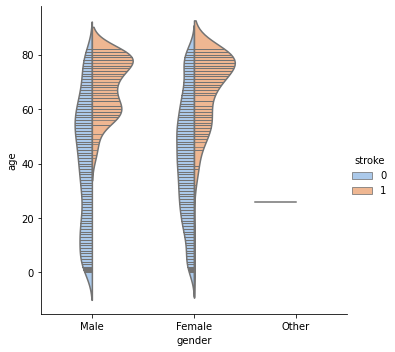

In [80]:
sns.catplot(x='gender', y='age', kind='violin', inner='stick', split=True, palette='pastel', data=df, hue='stroke')

- for the female gender, stroke events start to occur just around the perimenopausal period and a minor peak is seen a little past the age of 50. This is in tandem with what is observed in the real world.

### - Hypertension

In [81]:
px.histogram(df, x='hypertension', color='stroke')

13.2% of individuals with hypertension had a stroke event

### - Age vs Hypertension

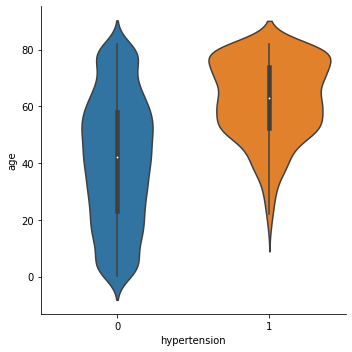

In [82]:
sns.catplot(x='hypertension', y='age', data=df, kind='violin')

Again, it's observed that the incidence of hypertension is much higher in older people.

## Data cleaning and Preprocessing

In [83]:
df.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


In [84]:
df['work_type'].value_counts()

Private          2925
Self-employed     819
children          687
Govt_job          657
Never_worked       22
Name: work_type, dtype: int64

In [85]:
def preprocess(dataframe):

  dataframe = dataframe.dropna(axis=0)
  dataframe = dataframe.drop('id', axis=1)
  
  cat_col = ['gender', 'hypertension', 'heart_disease', 'ever_married', 'work_type', 'Residence_type', 'smoking_status']
  dataframe[cat_col] = dataframe[cat_col].astype('category')


  dataframe = pd.get_dummies(dataframe, columns = ['gender', 'ever_married', 'work_type', 'Residence_type', 'smoking_status'])
  return dataframe


In [86]:
df = preprocess(df)
df.head()

,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke,gender_Female,gender_Male,gender_Other,ever_married_No,ever_married_Yes,work_type_Govt_job,work_type_Never_worked,work_type_Private,work_type_Self-employed,work_type_children,Residence_type_Rural,Residence_type_Urban,smoking_status_Unknown,smoking_status_formerly smoked,smoking_status_never smoked,smoking_status_smokes
0,67.0,0,1,228.69,36.6,1,0,1,0,0,1,0,0,1,0,0,0,1,0,1,0,0
2,80.0,0,1,105.92,32.5,1,0,1,0,0,1,0,0,1,0,0,1,0,0,0,1,0
3,49.0,0,0,171.23,34.4,1,1,0,0,0,1,0,0,1,0,0,0,1,0,0,0,1
4,79.0,1,0,174.12,24.0,1,1,0,0,0,1,0,0,0,1,0,1,0,0,0,1,0
5,81.0,0,0,186.21,29.0,1,0,1,0,0,1,0,0,1,0,0,0,1,0,1,0,0


In [87]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

df[['age', 'avg_glucose_level', 'bmi']] = scaler.fit_transform(df[['age', 'avg_glucose_level', 'bmi']])

df

,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke,gender_Female,gender_Male,gender_Other,ever_married_No,ever_married_Yes,work_type_Govt_job,work_type_Never_worked,work_type_Private,work_type_Self-employed,work_type_children,Residence_type_Rural,Residence_type_Urban,smoking_status_Unknown,smoking_status_formerly smoked,smoking_status_never smoked,smoking_status_smokes
0,0.816895,0,1,0.801265,0.301260,1,0,1,0,0,1,0,0,1,0,0,0,1,0,1,0,0
2,0.975586,0,1,0.234512,0.254296,1,0,1,0,0,1,0,0,1,0,0,1,0,0,0,1,0
3,0.597168,0,0,0.536008,0.276060,1,1,0,0,0,1,0,0,1,0,0,0,1,0,0,0,1
4,0.963379,1,0,0.549349,0.156930,1,1,0,0,0,1,0,0,0,1,0,1,0,0,0,1,0
5,0.987793,0,0,0.605161,0.214204,1,0,1,0,0,1,0,0,1,0,0,0,1,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5104,0.157715,0,0,0.221402,0.095074,0,1,0,0,1,0,0,0,0,0,1,1,0,1,0,0,0
5106,0.987793,0,0,0.323516,0.340206,0,1,0,0,0,1,0,0,0,1,0,0,1,0,0,1,0
5107,0.426270,0,0,0.128658,0.232532,0,1,0,0,0,1,0,0,0,1,0,1,0,0,0,1,0
5108,0.621582,0,0,0.513203,0.175258,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0


Model Building

In [88]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

In [90]:
x = df.drop('stroke', axis=1)
y = df['stroke']

In [91]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3)

Random Forest

Text(0, 0.5, 'Testing Accuracy')

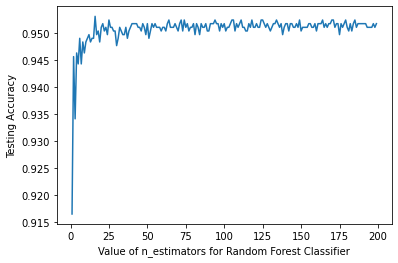

In [93]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
scores =[] 
for k in range(1, 200): 
  rfc = RandomForestClassifier(n_estimators=k) 
  rfc.fit(x_train, y_train) 
  y_pred = rfc.predict(x_test) 
  scores.append(accuracy_score(y_test, y_pred)) 

import matplotlib.pyplot as plt 
%matplotlib inline 
# plot the relationship between K and testing accuracy 
# plt.plot(x_axis, y_axis) 
plt.plot(range(1, 200), scores) 

plt.xlabel('Value of n_estimators for Random Forest Classifier') 
plt.ylabel('Testing Accuracy')

In [94]:
rfc = RandomForestClassifier(n_estimators=25)

rfc.fit(x_train, y_train)

RandomForestClassifier(n_estimators=25)

In [95]:
y_pred = rfc.predict(x_test)

In [99]:
accuracy_score(y_test, y_pred)

0.9490835030549898

In [96]:
from sklearn.metrics import classification_report

In [98]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.95      1.00      0.97      1402
           1       0.00      0.00      0.00        71

    accuracy                           0.95      1473
   macro avg       0.48      0.50      0.49      1473
weighted avg       0.91      0.95      0.93      1473



Logistic Regression

In [100]:
from sklearn.linear_model import LogisticRegression

In [101]:
clf = LogisticRegression().fit(x_train, y_train)

In [102]:
prediction = clf.predict(x_test)

In [103]:
accuracy_score(y_test, prediction)

0.9524779361846571

In [104]:
print(classification_report(y_test, prediction))

              precision    recall  f1-score   support

           0       0.95      1.00      0.98      1402
           1       1.00      0.01      0.03        71

    accuracy                           0.95      1473
   macro avg       0.98      0.51      0.50      1473
weighted avg       0.95      0.95      0.93      1473

